In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/USER/Documents/Github/Machine Learning/datasets/insurance.csv')
df.shape



(1338, 7)

In [94]:
print(df.describe())
df.info()
df.dtypes

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: floa

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [95]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [96]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [97]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

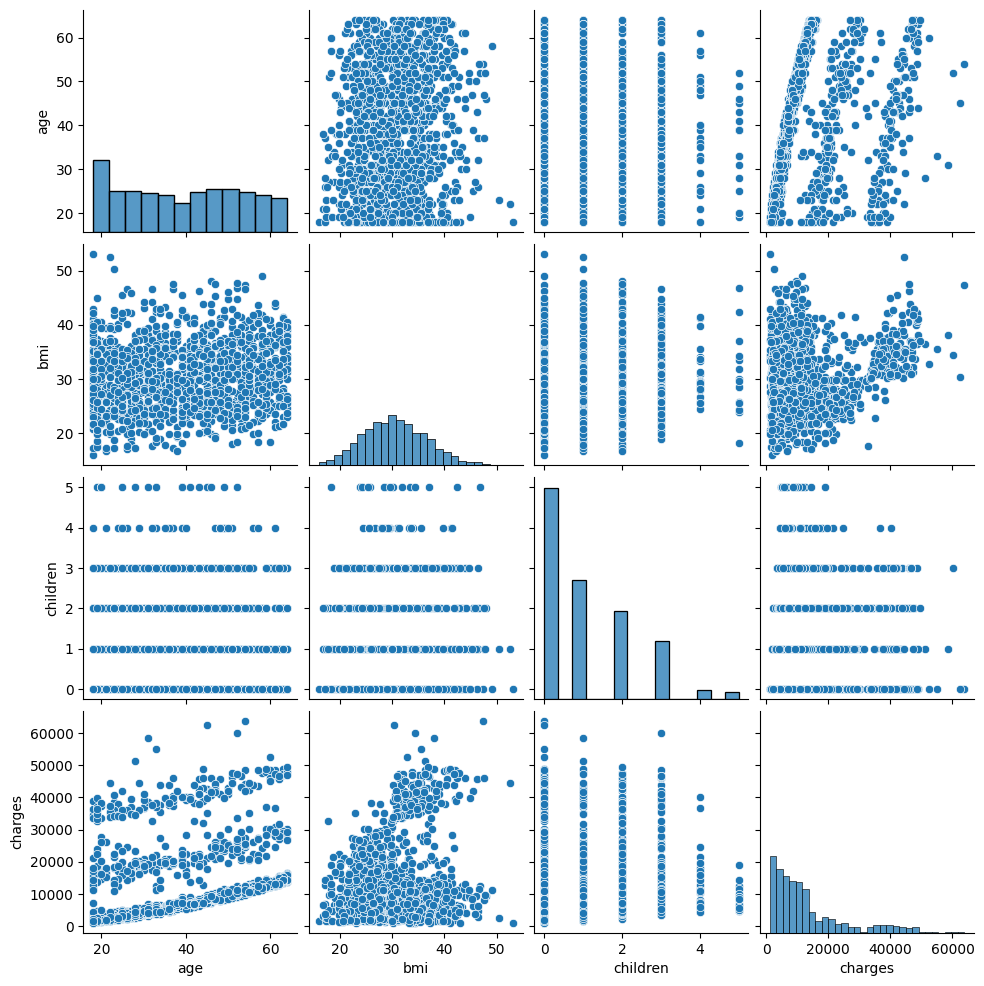

In [98]:
sns.pairplot(data=df)

<Axes: >

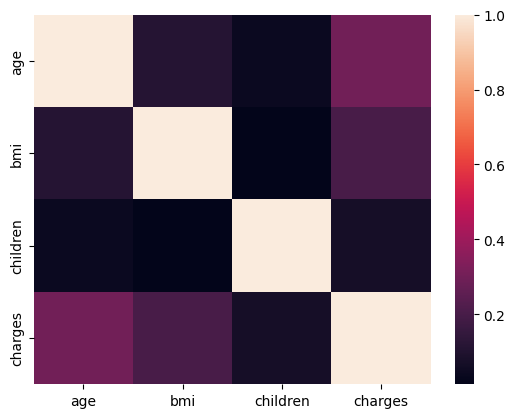

In [99]:
corr=df.corr(numeric_only=True)
sns.heatmap(data=corr)

<Axes: xlabel='sex', ylabel='age'>

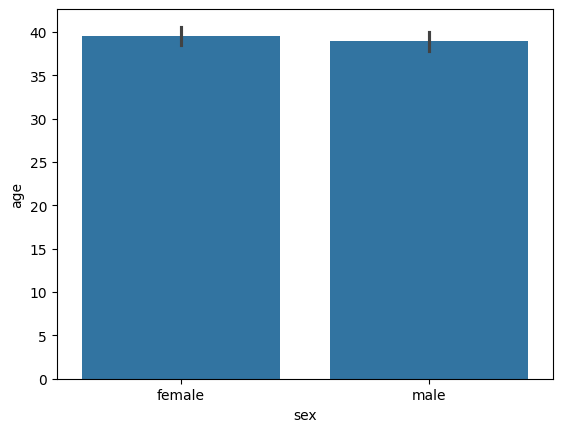

In [100]:
sns.barplot(data=df,x='sex',y='age')

<Axes: xlabel='age', ylabel='Count'>

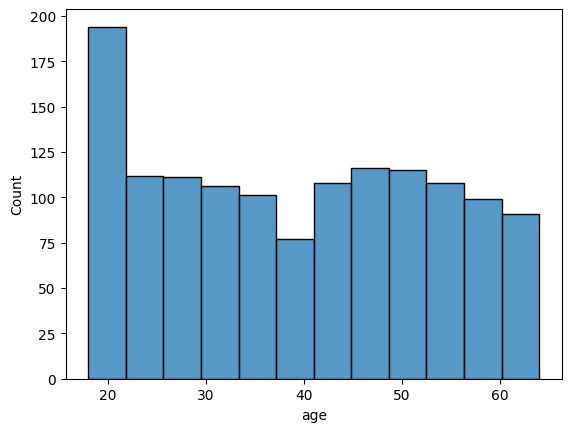

In [101]:
sns.histplot(data=df,x='age')

<Axes: xlabel='age'>

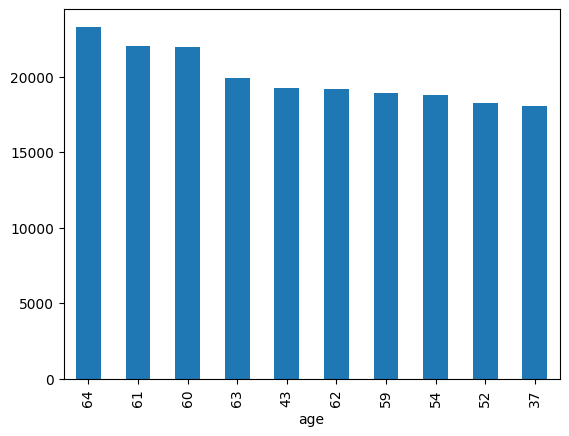

In [102]:
df.groupby('age')['charges'].mean().sort_values().nlargest(10).plot(kind='bar')

<Axes: >

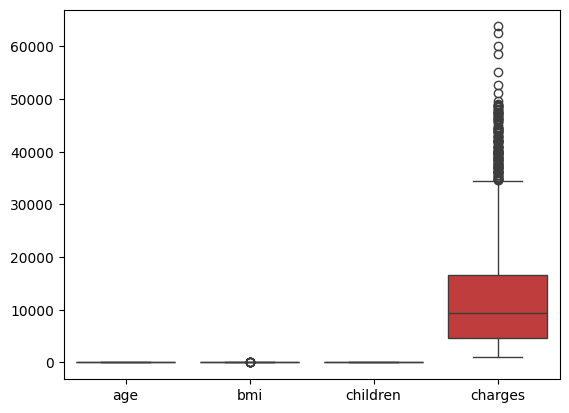

In [103]:
sns.boxplot(data=df)

In [104]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

le=LabelEncoder()
scaler=StandardScaler()

df['sex_label']=le.fit_transform(df['sex'])


df=pd.concat([df,pd.get_dummies(data=df['region'],prefix='region')],axis=1)



df['scaled_charges']=scaler.fit_transform(df[['charges']])
df.drop(['sex','region'],axis=1,inplace=True)

df.head()

,age,bmi,children,smoker,charges,sex_label,region_northeast,region_northwest,region_southeast,region_southwest,scaled_charges
0,19,27.900,0,yes,16884.92400,0,False,False,False,True,0.298584
1,18,33.770,1,no,1725.55230,1,False,False,True,False,-0.953689
2,28,33.000,3,no,4449.46200,1,False,False,True,False,-0.728675
3,33,22.705,0,no,21984.47061,1,False,True,False,False,0.719843
4,32,28.880,0,no,3866.85520,1,False,True,False,False,-0.776802


In [108]:

df.dropna()

,age,bmi,children,smoker,charges,sex_label,region_northeast,region_northwest,region_southeast,region_southwest,scaled_charges
0,19,27.900,0,yes,16884.92400,0,False,False,False,True,0.298584
1,18,33.770,1,no,1725.55230,1,False,False,True,False,-0.953689
2,28,33.000,3,no,4449.46200,1,False,False,True,False,-0.728675
3,33,22.705,0,no,21984.47061,1,False,True,False,False,0.719843
4,32,28.880,0,no,3866.85520,1,False,True,False,False,-0.776802
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,1,False,True,False,False,-0.220551
1334,18,31.920,0,no,2205.98080,0,True,False,False,False,-0.914002
1335,18,36.850,0,no,1629.83350,0,False,False,True,False,-0.961596
1336,21,25.800,0,no,2007.94500,0,False,False,False,True,-0.930362


In [106]:
df.isnull().sum()

age                 0
bmi                 0
children            0
smoker              0
charges             0
sex_label           0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
scaled_charges      0
dtype: int64

In [107]:

df.head()

,age,bmi,children,smoker,charges,sex_label,region_northeast,region_northwest,region_southeast,region_southwest,scaled_charges
0,19,27.900,0,yes,16884.92400,0,False,False,False,True,0.298584
1,18,33.770,1,no,1725.55230,1,False,False,True,False,-0.953689
2,28,33.000,3,no,4449.46200,1,False,False,True,False,-0.728675
3,33,22.705,0,no,21984.47061,1,False,True,False,False,0.719843
4,32,28.880,0,no,3866.85520,1,False,True,False,False,-0.776802


<Axes: ylabel='bmi'>

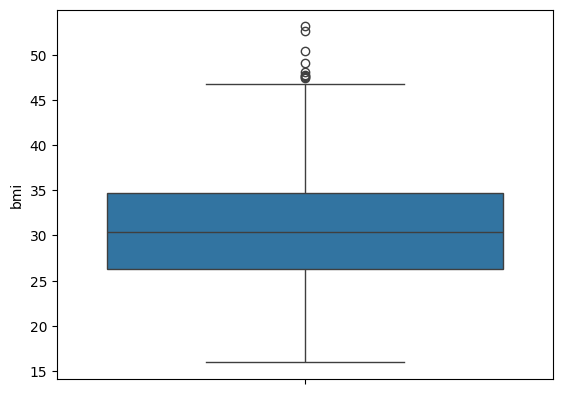

In [109]:
sns.boxplot(data=df['bmi'])

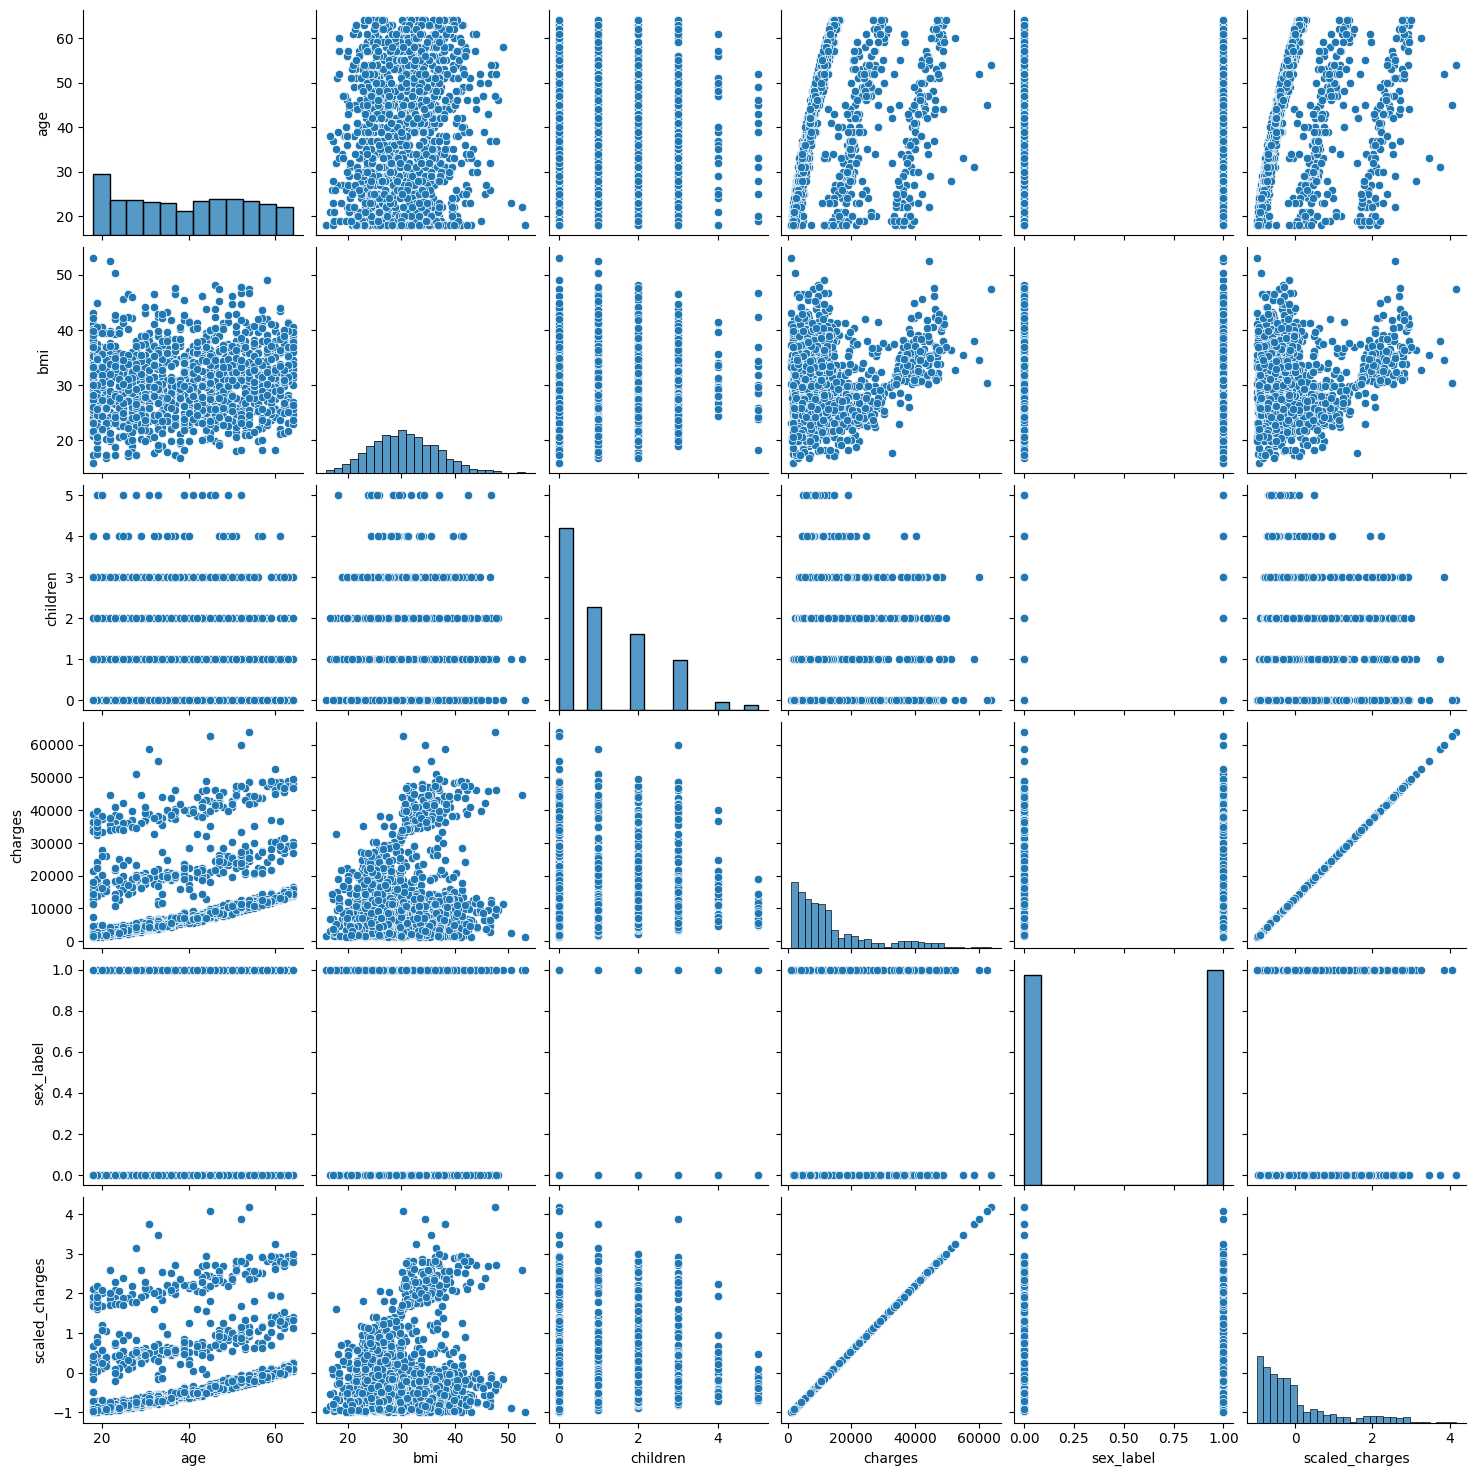

In [112]:
numeic_col=df.select_dtypes(include='number')

sns.pairplot(data=numeic_col)

<Axes: ylabel='bmi'>

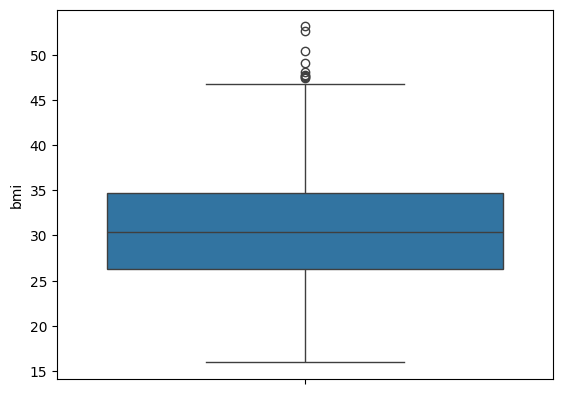

In [113]:
sns.boxplot(df['bmi'])

In [116]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(lower_bound)
print(upper_bound)

outliers=df[(df['bmi']<lower_bound)|(df['bmi']>upper_bound)]
print(outliers)

13.7
47.290000000000006
      age    bmi  children smoker      charges  sex_label  region_northeast  \
116    58  49.06         0     no  11381.32540          1             False   
286    46  48.07         2     no   9432.92530          0              True   
401    47  47.52         1     no   8083.91980          1             False   
543    54  47.41         0    yes  63770.42801          0             False   
847    23  50.38         1     no   2438.05520          1             False   
860    37  47.60         2    yes  46113.51100          0             False   
1047   22  52.58         1    yes  44501.39820          1             False   
1088   52  47.74         1     no   9748.91060          1             False   
1317   18  53.13         0     no   1163.46270          1             False   

      region_northwest  region_southeast  region_southwest  scaled_charges  
116              False              True             False       -0.156053  
286              False         